Problem 1

Optimal K: 2


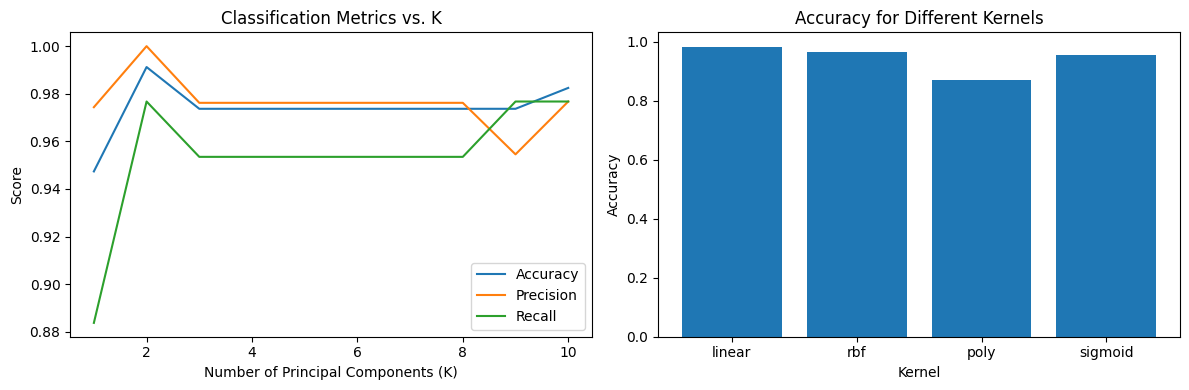

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Step 1: Load and Prepare Data
file_path = '/content/drive/MyDrive/cancer.csv'
data = pd.read_csv(file_path)

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Handling missing values with data imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Perform PCA for Different Numbers of Components (K)
k_values = range(1, 11)
best_accuracy = 0
best_k = 0
accuracy_scores = []
precision_scores = []
recall_scores = []

for k in k_values:
    # Perform PCA with k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train an SVM classifier
    svm = SVC(kernel='linear')
    svm.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test_pca)

    # Convert labels to strings
    y_test_str = y_test.astype(str)
    y_pred_str = y_pred.astype(str)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test_str, y_pred_str)
    precision = precision_score(y_test_str, y_pred_str, pos_label='M')  # 'M' represents Malignant
    recall = recall_score(y_test_str, y_pred_str, pos_label='M')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Update best K and accuracy if necessary
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Optimal K: {best_k}")

# Step 3: Plot Classification Metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.legend()
plt.title('Classification Metrics vs. K')

# Step 4: Explore Different Kernel Tricks
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracy_scores = []

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test_pca)

    # Convert labels to strings
    y_test_str = y_test.astype(str)
    y_pred_str = y_pred.astype(str)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_str, y_pred_str)
    accuracy_scores.append(accuracy)

plt.subplot(1, 2, 2)
plt.bar(kernels, accuracy_scores)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Kernels')

plt.tight_layout()
plt.show()


Problem 2

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


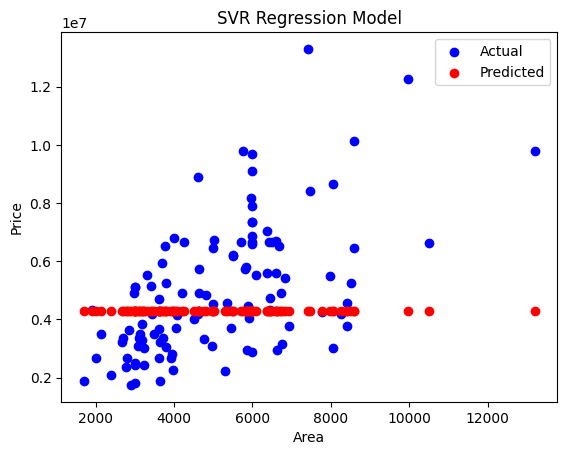

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset (replace 'housing_data.csv' with your data file)
file_path = '/content/drive/MyDrive/Housing.csv'
data = pd.read_csv(file_path)

# Select the input features and the target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price']

# Define which features are categorical
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Create transformers for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Combine transformers for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [0, 1, 2, 3, 9]),
        ('cat', categorical_transformer, [4, 5, 6, 7, 8, 10])
    ])

# Create the SVR model
svr = SVR(kernel='linear')

# Create a pipeline to apply preprocessing and SVR in sequence
model = Pipeline(steps=[('preprocessor', preprocessor), ('model', svr)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline model to the training data
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Visualize the Results
# Find the index of 'Area' feature in the one-hot encoded data (it depends on the order of columns)
area_index = X.columns.get_loc('area')

plt.scatter(X_test.iloc[:, area_index], y_test, color='b', label='Actual')
plt.scatter(X_test.iloc[:, area_index], y_pred, color='r', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('SVR Regression Model')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Best Kernel: poly, Best Accuracy: -0.06326843765641228, Best K: 1


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


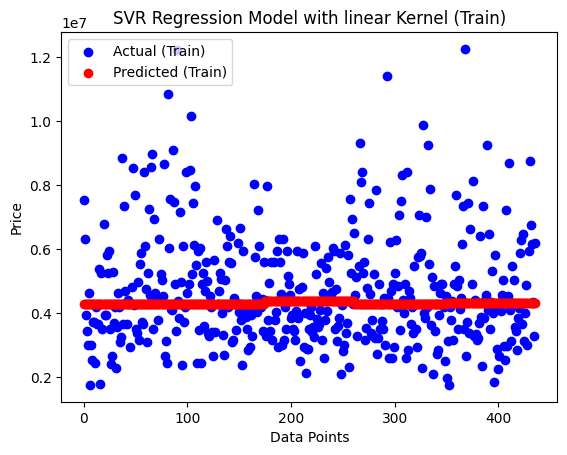

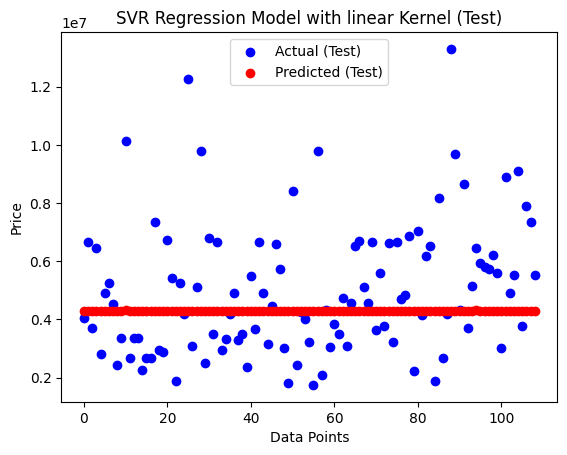

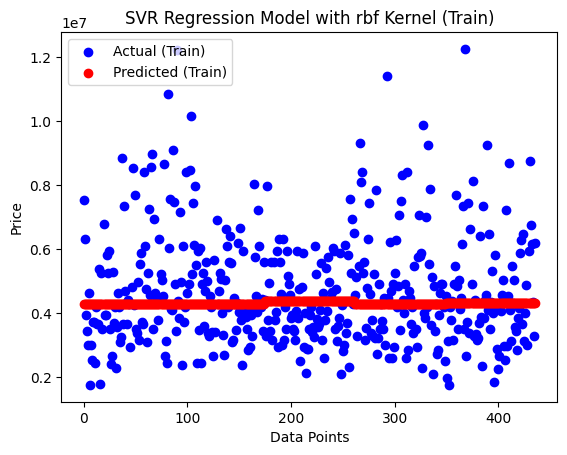

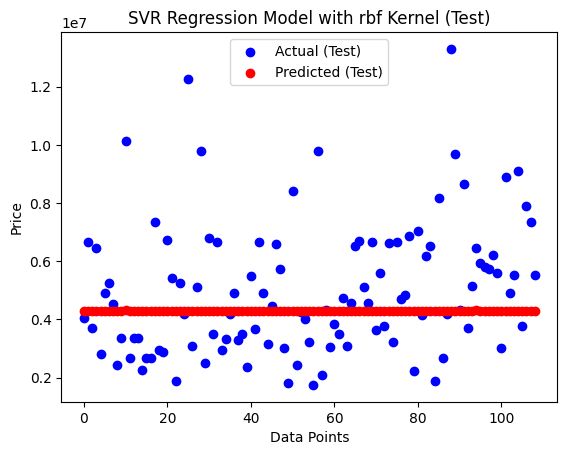

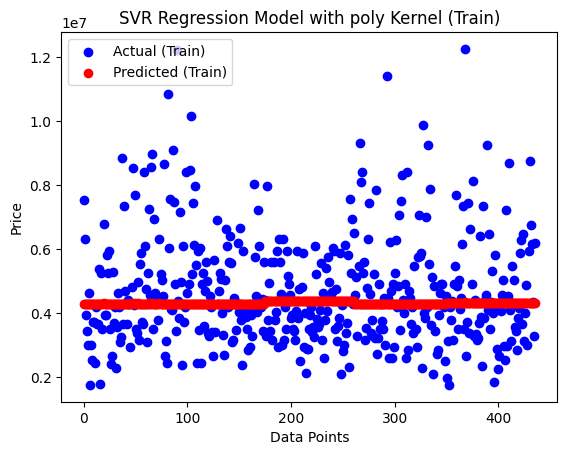

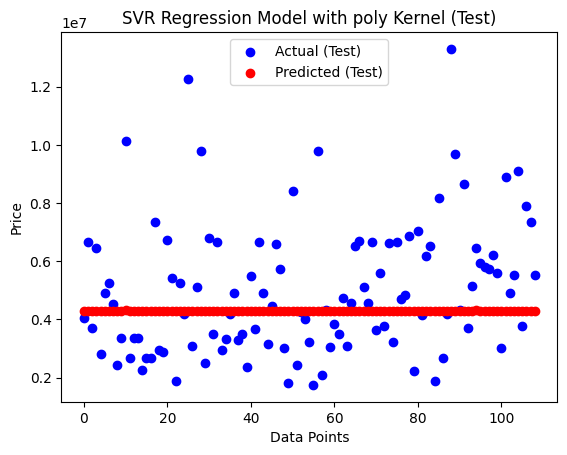

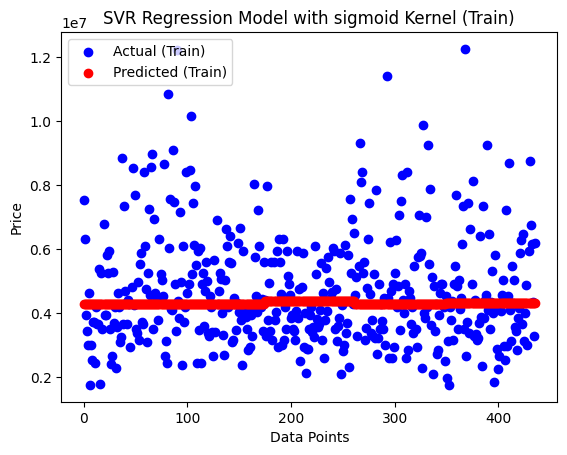

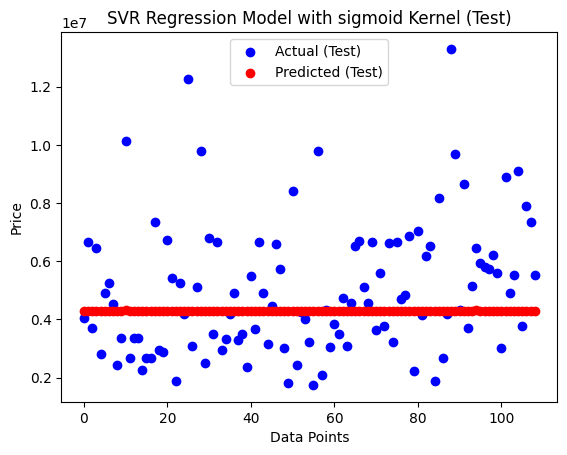

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset (replace 'housing_data.csv' with your data file)
file_path = '/content/drive/MyDrive/Housing.csv'
data = pd.read_csv(file_path)

# Select the input features and the target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price']

# Define which features are categorical
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Create transformers for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Combine transformers for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [0, 1, 2, 3, 9]),
        ('cat', categorical_transformer, [4, 5, 6, 7, 8, 10])
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the list of kernels to explore
kernel_list = ['linear', 'rbf', 'poly', 'sigmoid']

# Initialize variables to store the best kernel, best accuracy, and best PCA component count
best_kernel = None
best_accuracy = -np.inf
best_k = None
best_model = None

# Lists to store the predictions for each kernel
kernel_predictions = {}

for kernel in kernel_list:
    for k in range(1, 12):  # Try different numbers of principal components
        # Create a pipeline with PCA and SVR
        pca = PCA(n_components=k)
        svr = SVR(kernel=kernel)
        model = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('svr', svr)])

        # Cross-validation to evaluate the model
        predicted = cross_val_predict(model, X_train, y_train, cv=5)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        accuracy = scores.mean()

        # Store the predictions for the kernel
        kernel_predictions[(kernel, k)] = predicted

        # Check if this model is the best so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = kernel
            best_k = k
            best_model = model

print(f"Best Kernel: {best_kernel}, Best Accuracy: {best_accuracy}, Best K: {best_k}")

# Train the best SVR model with the entire training dataset
best_pca = PCA(n_components=best_k)
best_svr = SVR(kernel=best_kernel)
best_model = Pipeline(steps=[('preprocessor', preprocessor), ('pca', best_pca), ('svr', best_svr)])
best_model.fit(X_train, y_train)

# Make Predictions
y_pred = best_model.predict(X_test)

# Visualize the Results for all kernels
for kernel in kernel_list:
    plt.figure()
    plt.scatter(range(len(y_train)), y_train, color='b', label='Actual (Train)')
    plt.scatter(range(len(y_train)), kernel_predictions[(kernel, best_k)], color='r', label='Predicted (Train)')
    plt.xlabel('Data Points')
    plt.ylabel('Price')
    plt.title(f'SVR Regression Model with {kernel} Kernel (Train)')
    plt.legend()

    plt.figure()
    plt.scatter(range(len(y_test)), y_test, color='b', label='Actual (Test)')
    plt.scatter(range(len(y_test)), y_pred, color='r', label='Predicted (Test)')
    plt.xlabel('Data Points')
    plt.ylabel('Price')
    plt.title(f'SVR Regression Model with {kernel} Kernel (Test)')
    plt.legend()

plt.show()
